<a href="https://colab.research.google.com/github/konjoinfinity/Bitcoin-Price-Prediction-using-linear-regression/blob/main/BeeTeeCee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pycaret.regression import *

In [ ]:
pip install NumPy==1.20

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.20.0-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: NumPy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.20.0 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.
en-core-web-sm 3.4.0 requires spacy<3.5.0,>=3.4.0, but you have spacy 2.3.7 which is incompatible.
cmdstanpy 1.0.7 requires numpy>=1.21, but you have numpy 1.20.0 which is incompatible.


In [ ]:
from google.colab import files
files.upload()

Saving BitcoinHistoricalData.csv to BitcoinHistoricalData (1).csv


{'BitcoinHistoricalData.csv': b'Date,Price,Open,High,Low\r\nSep 24 2022,18983.50,19288.40,19310.60,18941.10\r\nSep 23 2022,19293.50,19404.10,19477.30,18554.80\r\nSep 22 2022,19404.00,18488.10,19490.90,18371.00\r\nSep 21 2022,18489.00,18875.10,19758.40,18191.80\r\nSep 20 2022,18872.40,19538.90,19626.30,18742.60\r\nSep 19 2022,19538.90,19417.40,19666.60,18277.80\r\nSep 18 2022,19418.80,20113.90,20113.90,19347.70\r\nSep 17 2022,20113.50,19802.80,20178.60,19761.00\r\nSep 16 2022,19802.40,19701.90,19883.00,19352.90\r\nSep 15 2022,19701.70,20222.30,20321.40,19532.30\r\nSep 14 2022,20222.50,20175.50,20503.70,19654.20\r\nSep 13 2022,20175.50,22395.30,22702.50,19909.60\r\nSep 12 2022,22395.30,21836.60,22465.40,21581.60\r\nSep 11 2022,21834.90,21650.40,21836.40,21363.00\r\nSep 10 2022,21650.40,21363.80,21790.60,21139.90\r\nSep 09 2022,21365.20,19318.80,21545.70,19294.10\r\nSep 08 2022,19317.40,19281.50,19444.70,19034.50\r\nSep 07 2022,19281.50,18786.30,19445.90,18548.40\r\nSep 06 2022,18786.40,1

In [ ]:
bitcoin = pd.read_csv('BitcoinHistoricalData.csv')
import datetime
bitcoin.shape
bitcoin.head()
bitcoin


#bitcoin['Vol.'] = bitcoin['Vol.'].str.replace('$', '', regex=True)
#bitcoin['Price'] = bitcoin['Price'].apply(lambda x: float(x.split()[0].replace(',', '')))
#bitcoin['Open'] = bitcoin['Open'].apply(lambda x: float(x.split()[0].replace(',', '')))
#bitcoin['High'] = bitcoin['High'].apply(lambda x: float(x.split()[0].replace(',', '')))
#bitcoin['Low'] = bitcoin['Low'].apply(lambda x: float(x.split()[0].replace(',', '')))

,Date,Price,Open,High,Low
0,Sep 24 2022,18983.5,19288.4,19310.6,18941.1
1,Sep 23 2022,19293.5,19404.1,19477.3,18554.8
2,Sep 22 2022,19404.0,18488.1,19490.9,18371.0
3,Sep 21 2022,18489.0,18875.1,19758.4,18191.8
4,Sep 20 2022,18872.4,19538.9,19626.3,18742.6
...,...,...,...,...,...
4447,Jul 22 2010,0.1,0.1,0.1,0.1
4448,Jul 21 2010,0.1,0.1,0.1,0.1
4449,Jul 20 2010,0.1,0.1,0.1,0.1
4450,Jul 19 2010,0.1,0.1,0.1,0.1


In [ ]:
btcDate = bitcoin

from datetime import datetime

for idx, row in btcDate.iterrows():
  dt = btcDate.loc[idx, 'Date']
  print(dt)
  dt = datetime.strptime(dt, '%b %d %Y')
  dt = dt.strftime('%Y%m%d')

  btcDate.loc[idx, 'Date'] = dt

btcDate

Sep 24 2022
Sep 23 2022
Sep 22 2022
Sep 21 2022
Sep 20 2022
Sep 19 2022
Sep 18 2022
Sep 17 2022
Sep 16 2022
Sep 15 2022
Sep 14 2022
Sep 13 2022
Sep 12 2022
Sep 11 2022
Sep 10 2022
Sep 09 2022
Sep 08 2022
Sep 07 2022
Sep 06 2022
Sep 05 2022
Sep 04 2022
Sep 03 2022
Sep 02 2022
Sep 01 2022
Aug 31 2022
Aug 30 2022
Aug 29 2022
Aug 28 2022
Aug 27 2022
Aug 26 2022
Aug 25 2022
Aug 24 2022
Aug 23 2022
Aug 22 2022
Aug 21 2022
Aug 20 2022
Aug 19 2022
Aug 18 2022
Aug 17 2022
Aug 16 2022
Aug 15 2022
Aug 14 2022
Aug 13 2022
Aug 12 2022
Aug 11 2022
Aug 10 2022
Aug 09 2022
Aug 08 2022
Aug 07 2022
Aug 06 2022
Aug 05 2022
Aug 04 2022
Aug 03 2022
Aug 02 2022
Aug 01 2022
Jul 31 2022
Jul 30 2022
Jul 29 2022
Jul 28 2022
Jul 27 2022
Jul 26 2022
Jul 25 2022
Jul 24 2022
Jul 23 2022
Jul 22 2022
Jul 21 2022
Jul 20 2022
Jul 19 2022
Jul 18 2022
Jul 17 2022
Jul 16 2022
Jul 15 2022
Jul 14 2022
Jul 13 2022
Jul 12 2022
Jul 11 2022
Jul 10 2022
Jul 09 2022
Jul 08 2022
Jul 07 2022
Jul 06 2022
Jul 05 2022
Jul 04 2022
Jul 

,Date,Price,Open,High,Low
0,20220924,18983.5,19288.4,19310.6,18941.1
1,20220923,19293.5,19404.1,19477.3,18554.8
2,20220922,19404.0,18488.1,19490.9,18371.0
3,20220921,18489.0,18875.1,19758.4,18191.8
4,20220920,18872.4,19538.9,19626.3,18742.6
...,...,...,...,...,...
4447,20100722,0.1,0.1,0.1,0.1
4448,20100721,0.1,0.1,0.1,0.1
4449,20100720,0.1,0.1,0.1,0.1
4450,20100719,0.1,0.1,0.1,0.1


In [ ]:
#calculate date 4 years previous - timedelta(days=1460)
#find matching date
#pull and compare price data
import datetime

btc = btcDate
#print(bitcoin['Date'].iloc[0])
if btc['Date'].iloc[0] == '20220924':
  print("Equal")

for idx, row in btc.iterrows():
  fyp = btc['Date'].iloc[idx]
  time_change = datetime.timedelta(days=-1460)
  fyp = datetime.datetime.strptime(fyp, '%Y%m%d') + time_change

  for i in range(len(btc.Date)):
    if fyp == btc.Date[i]:
      print(btc.Date[i])
      indx = i

      #btc.iloc[indx]
      #print(indx)

  print('-------------------------')  
  print('Index Price: $$$')
  print(btc['Price'].loc[[idx]])
  print('-------------------------')
  print('Historical Price: $$$')
  print(btc['Price'].iloc[indx])
  print('-------------------------')
  print('Price Difference: $$$')
  print(btc['Price'].loc[[idx]] - btc['Price'].iloc[indx])
  btc['Price'].loc[[idx]] > btc['Price'].iloc[indx]

  btc['Price'].loc[[idx]] < btc['Price'].iloc[indx]

Streaming output truncated to the last 5000 lines.
Historical Price: $$$
18983.5
-------------------------
Price Difference: $$$
220    24900.1
Name: Price, dtype: float64
-------------------------
Index Price: $$$
221    44544.4
Name: Price, dtype: float64
-------------------------
Historical Price: $$$
18983.5
-------------------------
Price Difference: $$$
221    25560.9
Name: Price, dtype: float64
-------------------------
Index Price: $$$
222    42550.3
Name: Price, dtype: float64
-------------------------
Historical Price: $$$
18983.5
-------------------------
Price Difference: $$$
222    23566.8
Name: Price, dtype: float64
-------------------------
Index Price: $$$
223    42061.1
Name: Price, dtype: float64
-------------------------
Historical Price: $$$
18983.5
-------------------------
Price Difference: $$$
223    23077.6
Name: Price, dtype: float64
-------------------------
Index Price: $$$
224    42205.2
Name: Price, dtype: float64
-------------------------
Historical Price:

KeyboardInterrupt: ignored

In [ ]:
btcRin = btcDate

btcRin['Date'] = pd.to_datetime(btcRin['Date'], format='%Y%m%d')

print (btcRin)
print (btcRin.dtypes)

indexBTC = btcRin.sort_values(by='Date')
indexBTC

           Date    Price     Open     High      Low
0    2022-09-24  18983.5  19288.4  19310.6  18941.1
1    2022-09-23  19293.5  19404.1  19477.3  18554.8
2    2022-09-22  19404.0  18488.1  19490.9  18371.0
3    2022-09-21  18489.0  18875.1  19758.4  18191.8
4    2022-09-20  18872.4  19538.9  19626.3  18742.6
...         ...      ...      ...      ...      ...
4447 2010-07-22      0.1      0.1      0.1      0.1
4448 2010-07-21      0.1      0.1      0.1      0.1
4449 2010-07-20      0.1      0.1      0.1      0.1
4450 2010-07-19      0.1      0.1      0.1      0.1
4451 2010-07-18      0.1      0.0      0.1      0.1

[4452 rows x 5 columns]
Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object


,Date,Price,Open,High,Low
4451,2010-07-18,0.1,0.0,0.1,0.1
4450,2010-07-19,0.1,0.1,0.1,0.1
4449,2010-07-20,0.1,0.1,0.1,0.1
4448,2010-07-21,0.1,0.1,0.1,0.1
4447,2010-07-22,0.1,0.1,0.1,0.1
...,...,...,...,...,...
4,2022-09-20,18872.4,19538.9,19626.3,18742.6
3,2022-09-21,18489.0,18875.1,19758.4,18191.8
2,2022-09-22,19404.0,18488.1,19490.9,18371.0
1,2022-09-23,19293.5,19404.1,19477.3,18554.8


Text(0, 0.5, '$ Price')

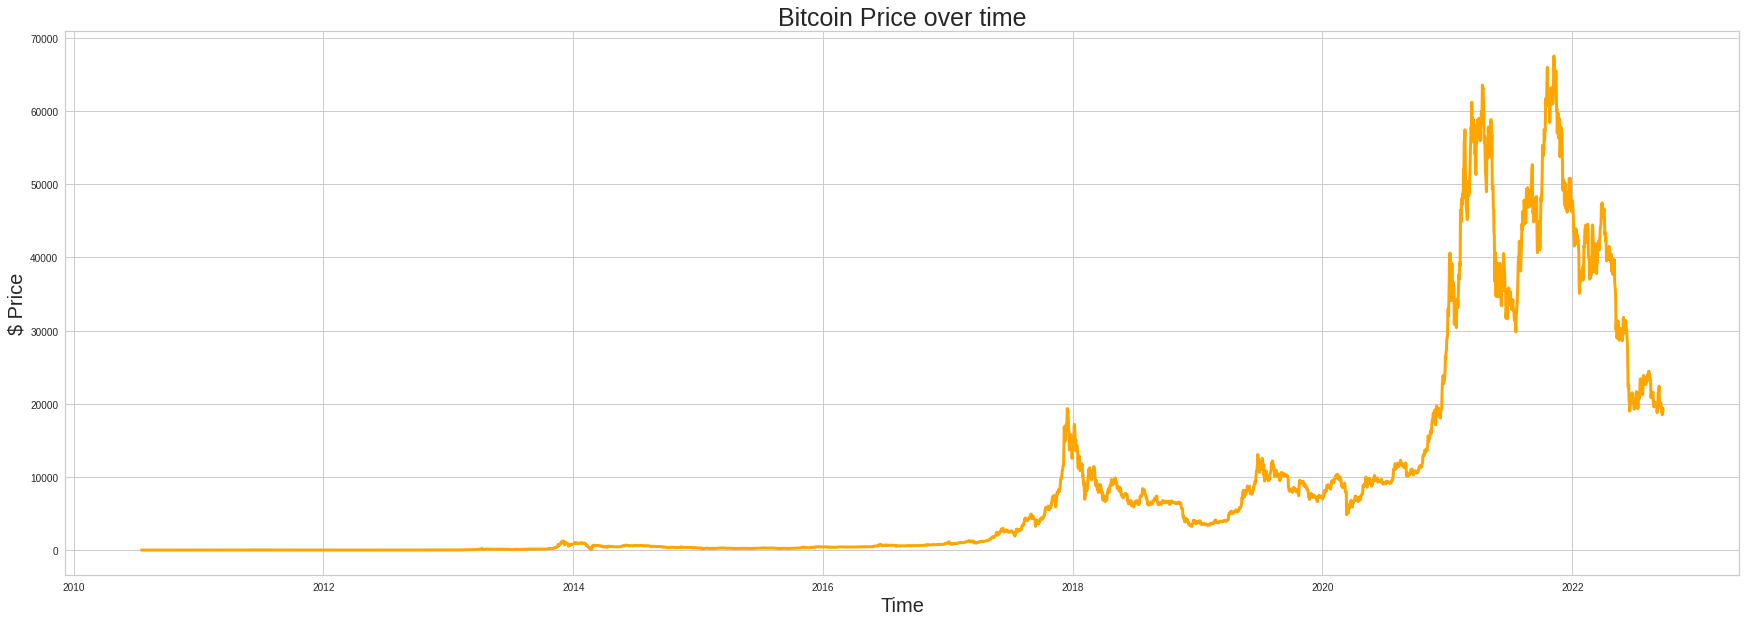

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.figure(figsize = (30, 10))
plt.plot(indexBTC["Date"], indexBTC["Price"], color='orange', lw=3)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

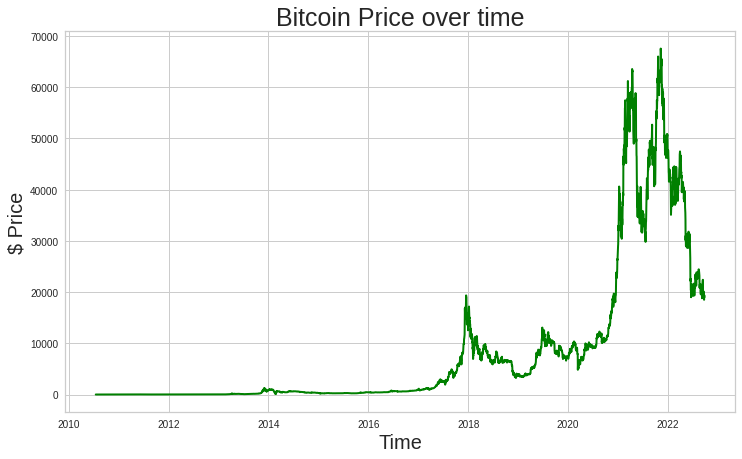

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(indexBTC["Date"], indexBTC["Price"], color='green', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
indexBTC

,Date,Price,Open,High,Low
4451,2010-07-18,0.1,0.0,0.1,0.1
4450,2010-07-19,0.1,0.1,0.1,0.1
4449,2010-07-20,0.1,0.1,0.1,0.1
4448,2010-07-21,0.1,0.1,0.1,0.1
4447,2010-07-22,0.1,0.1,0.1,0.1
...,...,...,...,...,...
4,2022-09-20,18872.4,19538.9,19626.3,18742.6
3,2022-09-21,18489.0,18875.1,19758.4,18191.8
2,2022-09-22,19404.0,18488.1,19490.9,18371.0
1,2022-09-23,19293.5,19404.1,19477.3,18554.8


In [ ]:
required_features = ['Open', 'High', 'Low']
output_label = 'Price'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
indexBTC[required_features],
indexBTC[output_label],
test_size = 0.3
)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.9995324014123893

In [ ]:
future_set = indexBTC.shift(periods=30).tail(30)
prediction = model.predict(future_set[required_features])
future_set
prediction

array([22672.68283627, 23772.98916597, 23936.75216652, 24271.47132448,
       23773.73028987, 23079.51262398, 22918.55219288, 23283.46006922,
       22832.75799546, 23266.83702371, 22984.55108463, 23186.92899935,
       24038.13977931, 23198.34162125, 23746.76236606, 24630.42667016,
       24086.7727194 , 24679.69785712, 24668.45683062, 24695.17813471,
       23854.60710416, 23846.2592617 , 23316.85989004, 21569.75024313,
       21190.21359776, 21511.94380972, 21028.94528795, 21224.39448038,
       21486.5812893 , 21641.16290425])

,Date,Price,Open,High,Low
29,2022-07-27,22958.3,21248.0,23027.8,21047.5
28,2022-07-28,23850.0,22957.7,24190.5,22611.6
27,2022-07-29,23774.3,23850.2,24340.0,23451.4
26,2022-07-30,23634.2,23774.2,24605.3,23521.8
25,2022-07-31,23303.4,23634.2,24179.3,23236.2
24,2022-08-01,23271.2,23303.4,23484.4,22863.8
23,2022-08-02,22988.6,23271.1,23423.3,22670.8
22,2022-08-03,22820.8,22988.7,23623.7,22698.6
21,2022-08-04,22612.1,22822.2,23214.5,22438.7
20,2022-08-05,23308.2,22613.3,23447.6,22593.5


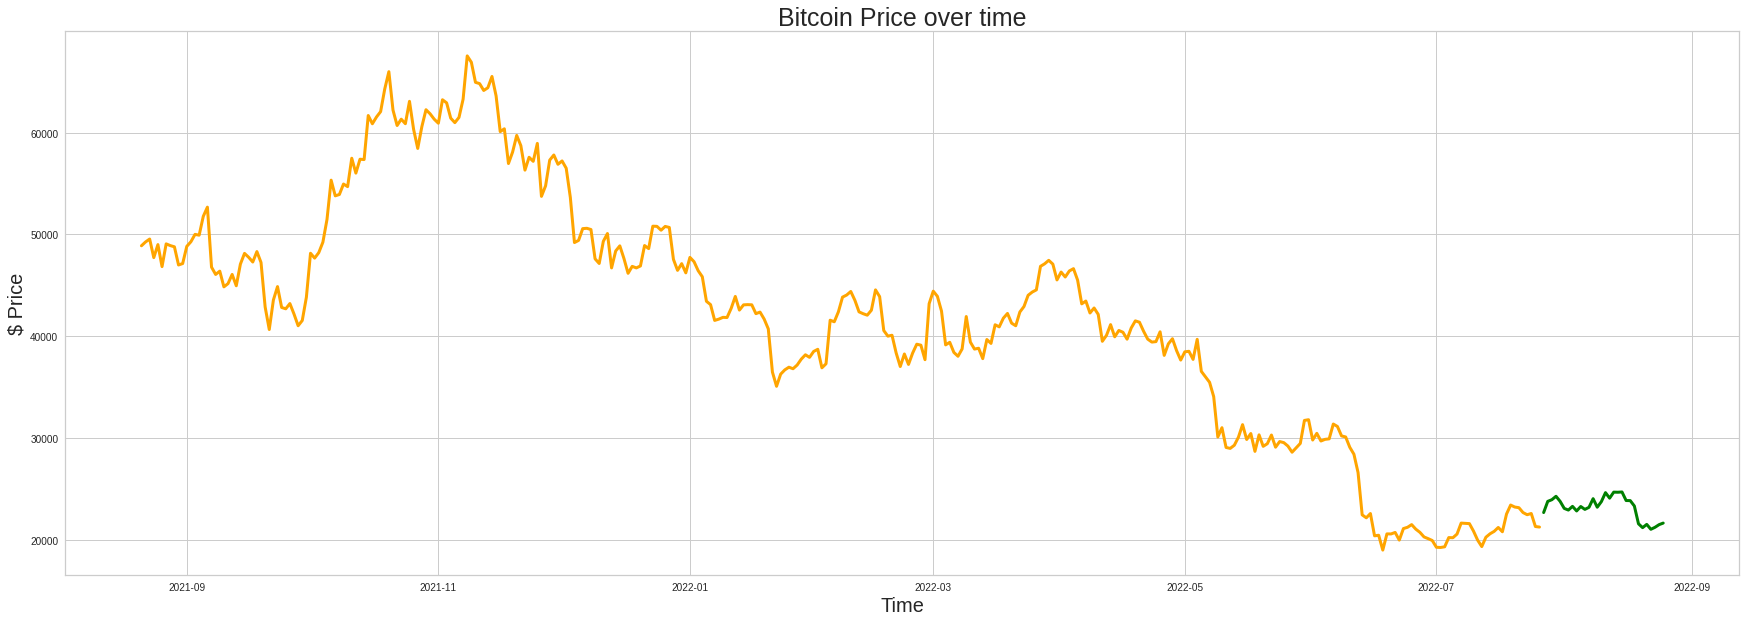

In [ ]:
plt.figure(figsize = (30, 10))
plt.plot(indexBTC["Date"][-400:-60], indexBTC["Price"][-400:-60], color='orange', lw=3)
plt.plot(future_set["Date"], prediction, color='green', lw=3)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
future_set

In [ ]:
pip install pandas numpy keras tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

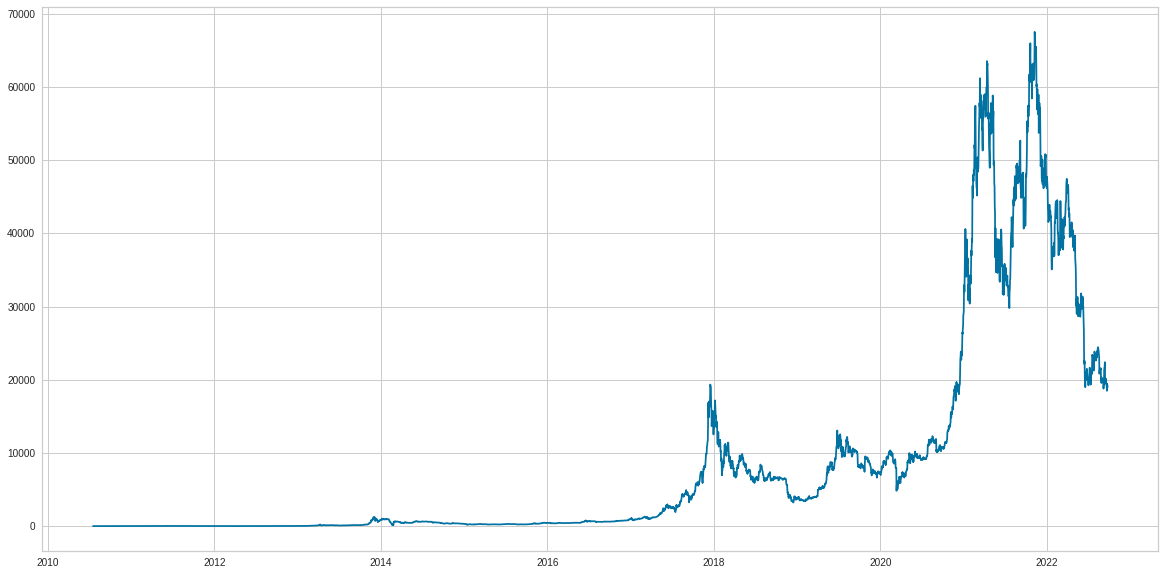

In [ ]:
indexBTC.index = indexBTC['Date']
plt.plot(indexBTC["Price"],label='Price history')

In [ ]:
indexBTC = indexBTC.sort_index(ascending=True,axis=0)
data = pd.DataFrame(index=range(0,len(indexBTC)),columns=['Date','Price'])
for i in range(0,len(data)):
    data["Date"][i]=indexBTC['Date'][i]
    data["Price"][i]=indexBTC["Price"][i]
data.head()

,Date,Price
0,2010-07-18 00:00:00,0.1
1,2010-07-19 00:00:00,0.1
2,2010-07-20 00:00:00,0.1
3,2010-07-21 00:00:00,0.1
4,2010-07-22 00:00:00,0.1


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
data.index=data.Date
data.drop('Date',axis=1, inplace=True)
final_data = data.values
train_data=final_data[0:3000,:]
valid_data=final_data[3000:,:]
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]
for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1],1))

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
model_data=data[len(data)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [ ]:
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

2940/2940 - 64s - loss: 7.9671e-05 - 64s/epoch - 22ms/step


In [ ]:
predicted_btc_price=lstm_model.predict(X_test)
predicted_btc_price=scaler.inverse_transform(predicted_btc_price)

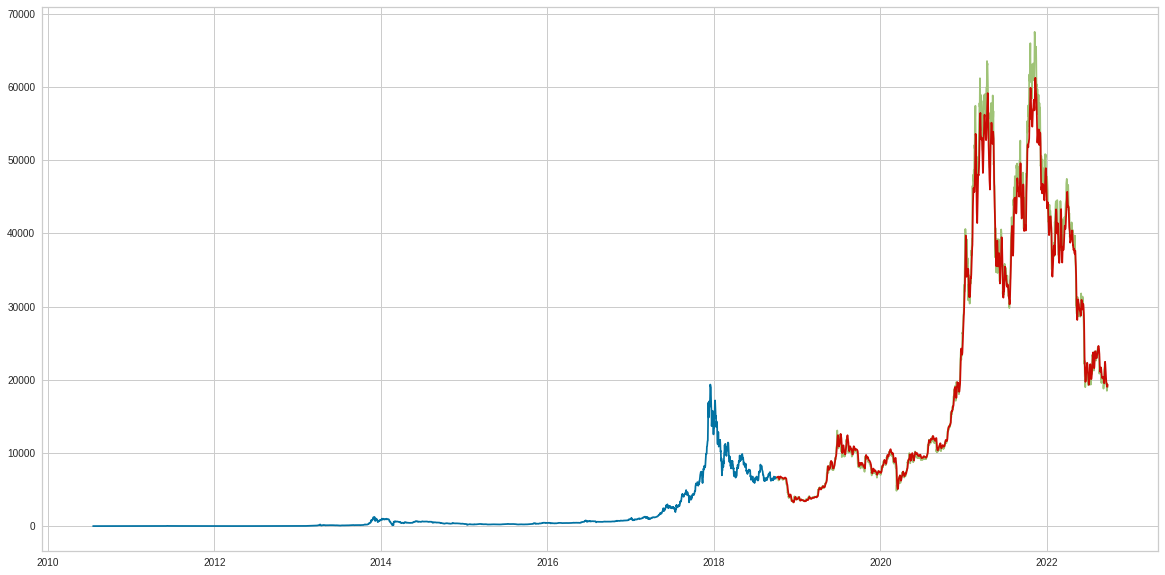

In [ ]:
train_data=data[:3000]
valid_data=data[3000:]
valid_data['Predictions']=predicted_btc_price
plt.plot(train_data["Price"])
plt.plot(valid_data[['Price',"Predictions"]])